In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, neighbors
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from collections import Counter
from scipy import stats
import missingno as msno
import statistics
import math
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
#Reading the data
pd.set_option('display.max_columns', None)
horses = pd.read_csv(r"C:\Users\caspe\OneDrive\Documenten\Casper\OpenClassroom\Project P\horse.csv")
horses

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


<AxesSubplot:>

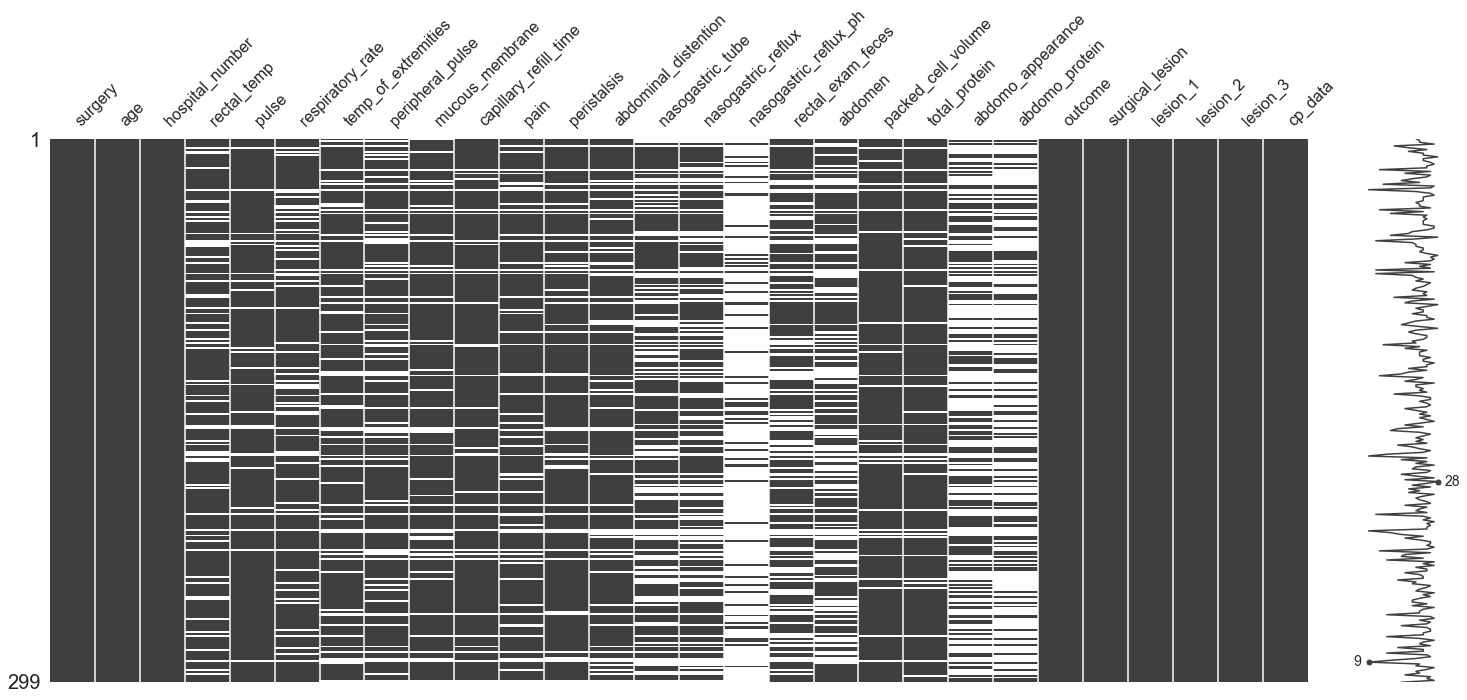

In [3]:
#checking for missing values
msno.matrix(horses)

<AxesSubplot:>

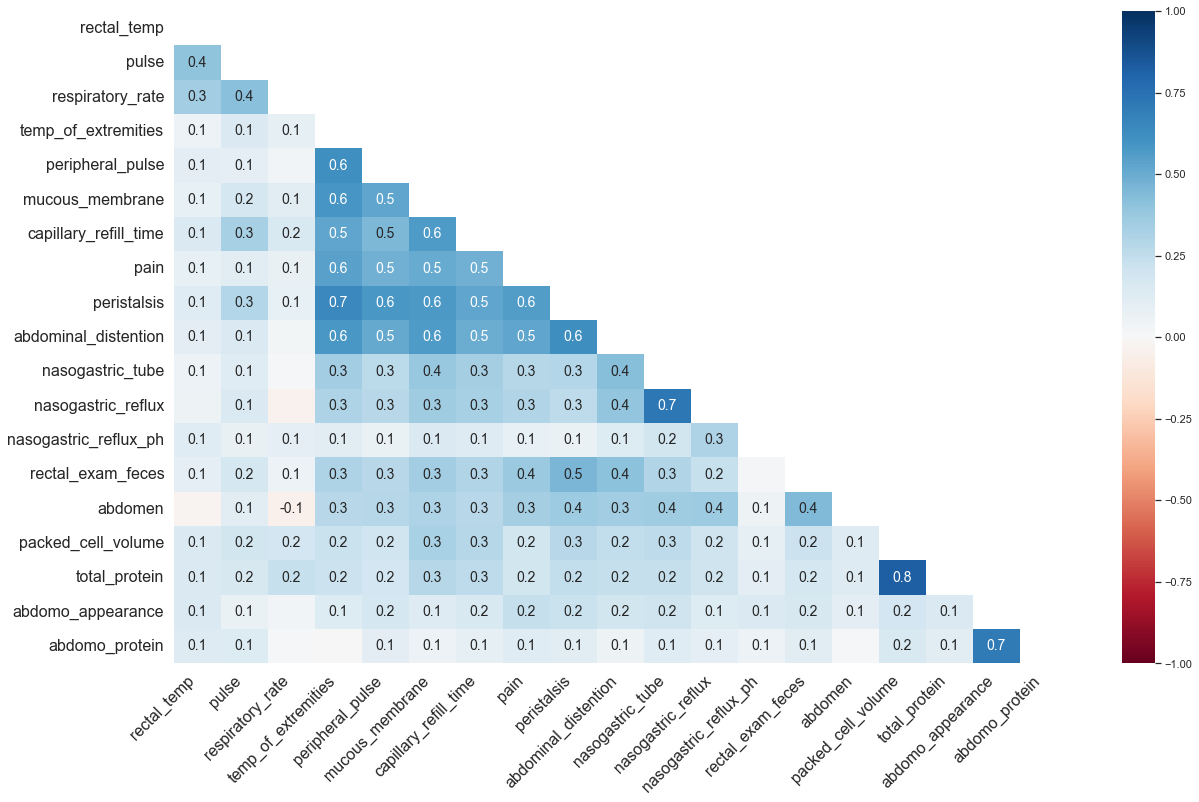

In [4]:
#Checking the interconnectedness of the missing values
msno.heatmap(horses)

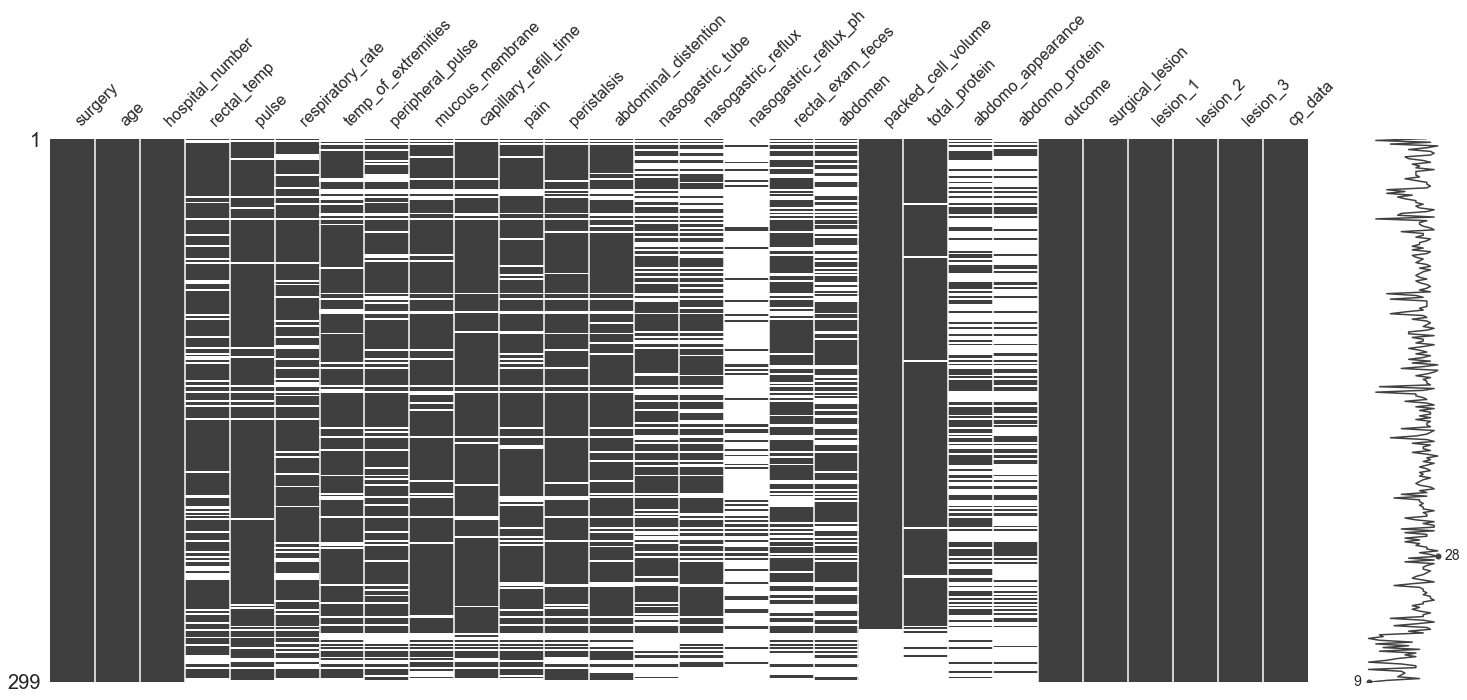

In [5]:
msno.matrix(horses.sort_values("packed_cell_volume"));

In [6]:
#numerical representation of the missing values
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
#removing columns that are unnecessary or have more than 33% null values
horses_1 = horses.loc[:, horses.isnull().mean() <= .33]
horses_1 = horses_1.drop(columns =['hospital_number', 'cp_data'])
horses_1

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,0,0
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,0,0
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,0,0
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,0,0
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,euthanized,no,3205,0,0
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,euthanized,yes,2208,0,0
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,died,yes,3205,0,0
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,lived,yes,2208,0,0


In [8]:
count_nan = horses_1.isnull().sum()
count_nan

surgery                   0
age                       0
rectal_temp              60
pulse                    24
respiratory_rate         58
temp_of_extremities      56
peripheral_pulse         69
mucous_membrane          47
capillary_refill_time    32
pain                     55
peristalsis              44
abdominal_distention     56
packed_cell_volume       29
total_protein            33
outcome                   0
surgical_lesion           0
lesion_1                  0
lesion_2                  0
lesion_3                  0
dtype: int64

In [9]:
#Mapping surgery, surgical lesion & age (all 3 binary data columns)
horses_1["age"] = horses_1["age"].map({"adult":1, "young":0})
horses_1["surgery"] = horses_1["surgery"].map({"yes":1, "no":0})
horses_1["surgical_lesion"] = horses_1["surgical_lesion"].map({"yes":1, "no":0})
horses_1

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,0,1,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,0,11300,0,0
1,1,1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,0,2208,0,0
2,0,1,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,0,0,0,0
3,1,0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,1,2208,0,0
4,0,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,0,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,euthanized,0,3205,0,0
295,0,1,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,euthanized,1,2208,0,0
296,1,1,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,died,1,3205,0,0
297,1,1,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,lived,1,2208,0,0


In [10]:
#Separate categorical and numerical columns
horse_num = horses_1.select_dtypes(include=np.number)
horse_cat = horses_1.select_dtypes(include=object)

In [11]:
#Imputing Nan in numerical columns
# Tranform
imp_num = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=10, random_state=148)
horses_num_imputed = pd.DataFrame(imp_num.fit_transform(horse_num), columns=horse_num.columns)

In [12]:
count_nan = horses_num_imputed.isnull().sum()
count_nan

surgery               0
age                   0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
surgical_lesion       0
lesion_1              0
lesion_2              0
lesion_3              0
dtype: int64

In [13]:
#Create bins for some numerical columns to use when imputing categorical columns
interval_range_1 = pd.interval_range(start=35, freq=1, end=41)
horses_num_imputed['cut_rt'] = pd.cut(horses_num_imputed['rectal_temp'], bins=interval_range_1)
horses_num_imputed['cut_rt'].value_counts()

(38, 39]    142
(37, 38]    119
(39, 40]     24
(36, 37]      9
(40, 41]      3
(35, 36]      2
Name: cut_rt, dtype: int64

In [14]:
interval_range_2 = pd.interval_range(start=0, freq=30, end = 210)
horses_num_imputed['cut_pu'] = pd.cut(horses_num_imputed['pulse'], bins=interval_range_2)
horses_num_imputed['cut_pu'].value_counts()

(30, 60]      135
(60, 90]       92
(90, 120]      52
(120, 150]     15
(0, 30]         2
(150, 180]      2
(180, 210]      1
Name: cut_pu, dtype: int64

In [15]:
horses_no_num_null = pd.concat([horses_num_imputed, horse_cat], axis=1)
horses_no_num_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [16]:
#Filling in Nan for temp_of_extremities using mode, grouped by age and binned rectal_temp data
#correlation between temp_of_extremities and rectal_temp as indicated in the accompanying documentation
horses_no_num_null['temp_of_extremities'] = horses_no_num_null.groupby(['age', 'cut_rt'])['temp_of_extremities']\
.transform(lambda x: x.fillna(x.mode()[0]))
horses_no_num_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",cool,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",cool,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [17]:
#Filling in Nan for peripheral_pulse, capillary_refill_time and mucous_membrane using mode, 
#grouped by age, surgery and binned pulse data
#correlation between variables as indicated in the accompanying documentation
horses_no_num_null['peripheral_pulse'] = horses_no_num_null.groupby(['age','cut_pu'], sort=False)\
['peripheral_pulse'].apply(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null['capillary_refill_time'] = horses_no_num_null.groupby(['age','cut_pu'], sort=False)\
['capillary_refill_time'].apply(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null['mucous_membrane'] = horses_no_num_null.groupby(['age','cut_pu'], sort=False)\
['mucous_membrane'].apply(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",cool,reduced,pale_pink,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",cool,reduced,dark_cyanotic,more_3_sec,NaN,NaN,NaN,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",cold,reduced,pale_cyanotic,more_3_sec,depressed,absent,NaN,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [18]:
#Filling in Nan for pain, peristalsis and abdominal_distention using mode, 
#grouped by binned pulse data
#correlation between variables as indicated in the accompanying documentation
horses_no_num_null['pain'] = horses_no_num_null.groupby(['cut_pu'])['pain']\
.transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null['peristalsis'] = horses_no_num_null.groupby(['cut_pu'])['peristalsis']\
.transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null['abdominal_distention'] = horses_no_num_null.groupby(['cut_pu'])['abdominal_distention']\
.transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))
horses_no_num_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",cool,reduced,pale_pink,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",cool,reduced,dark_cyanotic,more_3_sec,extreme_pain,absent,moderate,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",cold,reduced,pale_cyanotic,more_3_sec,depressed,absent,moderate,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [19]:
count_nan = horses_no_num_null.isnull().sum()
count_nan

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
packed_cell_volume       0
total_protein            0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cut_rt                   0
cut_pu                   0
temp_of_extremities      0
peripheral_pulse         6
mucous_membrane          9
capillary_refill_time    2
pain                     2
peristalsis              2
abdominal_distention     8
outcome                  0
dtype: int64

In [20]:
#fill in remaining NaN in categorical columns with mode
for col in horses_no_num_null.columns.values:
    if (horses_no_num_null[col].isnull().sum()>0):  
        if (horses_no_num_null[col].dtype == 'object'):
            horses_no_num_null[col].fillna(horses_no_num_null[col].mode()[0], inplace = True)
horses_no_num_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",cool,reduced,pale_pink,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",cool,reduced,dark_cyanotic,more_3_sec,extreme_pain,absent,moderate,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",cold,reduced,pale_cyanotic,more_3_sec,depressed,absent,moderate,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [21]:
count_nan = horses_no_num_null.isnull().sum()
count_nan

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
packed_cell_volume       0
total_protein            0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cut_rt                   0
cut_pu                   0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
outcome                  0
dtype: int64

In [22]:
horses_with_dummies = pd.get_dummies(horses_no_num_null, prefix_sep='_', 
                            columns=['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 
                                     'pain', 'peristalsis', 'abdominal_distention'], drop_first=True)
horses_with_dummies

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cut_rt,cut_pu,outcome,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,"(38, 39]","(60, 90]",died,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,"(39, 40]","(60, 90]",euthanized,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,"(38, 39]","(30, 60]",lived,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,"(39, 40]","(150, 180]",died,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,"(37, 38]","(90, 120]",died,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,"(39, 40]","(90, 120]",euthanized,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,"(37, 38]","(60, 90]",euthanized,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,"(37, 38]","(60, 90]",died,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,"(36, 37]","(90, 120]",lived,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0


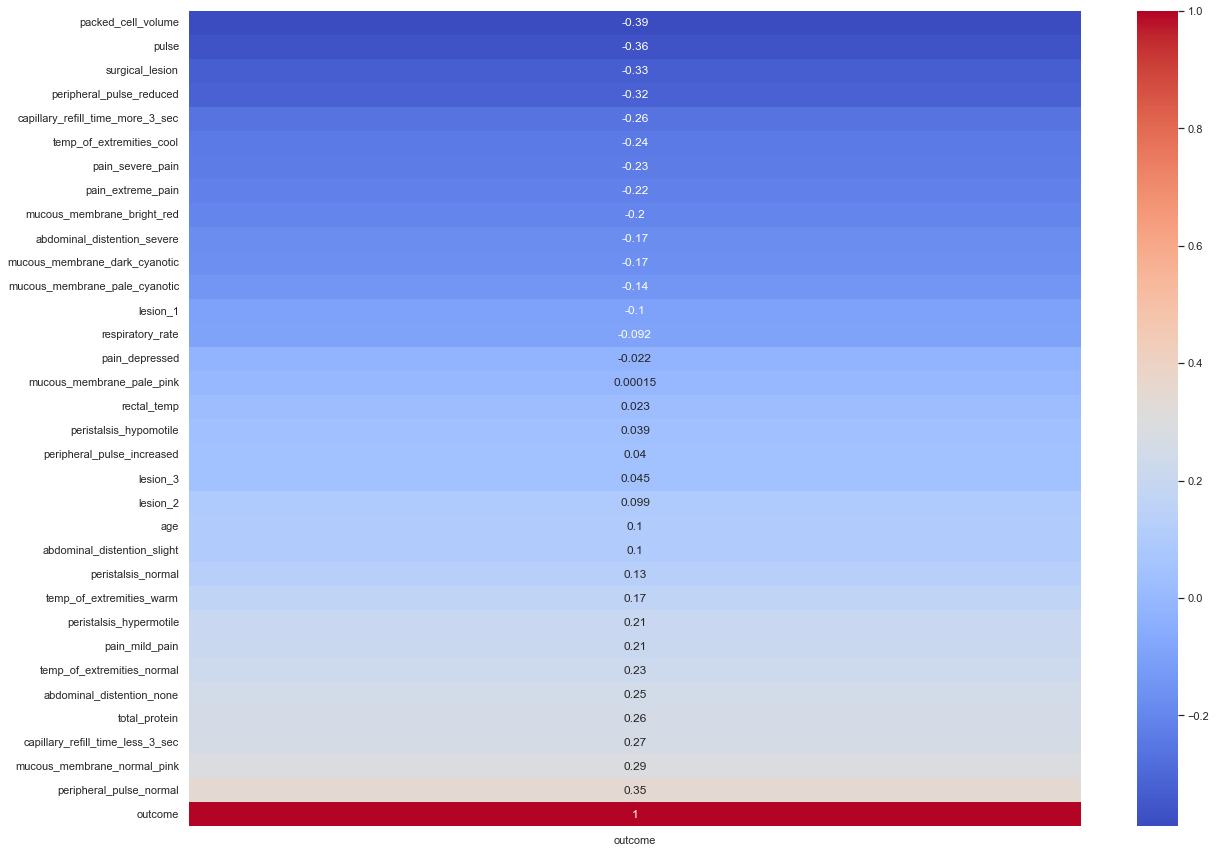

In [23]:
horses_with_dummies["outcome"] = horses_with_dummies["outcome"].map({"lived":2, "euthanized":1, "died":0})
correlation = pd.DataFrame(horses_with_dummies[horses_with_dummies.columns[1:]].corr()['outcome'][:].sort_values())
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# prepare data for Machine Learning treatments
data = horses_with_dummies.copy()
data = data.drop(["cut_rt", "cut_pu"], axis=1)
data

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,outcome,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,2,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0


In [25]:
y = data["outcome"]
X = data.drop(["outcome"], axis = 1)

In [26]:
#Scaling the data to give equal weight to all features
scaled_data_dum = StandardScaler().fit_transform(X)
np.mean(scaled_data_dum),np.std(scaled_data_dum)

(1.172472397440063e-16, 1.0)

In [27]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data_dum, y, test_size=0.20, random_state=42, stratify=y)

y_train.value_counts(), y_test.value_counts()

(2    142
 0     62
 1     35
 Name: outcome, dtype: int64,
 2    36
 0    15
 1     9
 Name: outcome, dtype: int64)

In [28]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.59


In [30]:
rf.score(X_test, y_test)

0.23785821305841903

In [31]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: pulse                Importance: 0.24
Variable: packed_cell_volume   Importance: 0.17
Variable: total_protein        Importance: 0.12
Variable: lesion_1             Importance: 0.08
Variable: rectal_temp          Importance: 0.07
Variable: respiratory_rate     Importance: 0.07
Variable: temp_of_extremities_cool Importance: 0.03
Variable: abdominal_distention_none Importance: 0.03
Variable: surgical_lesion      Importance: 0.02
Variable: temp_of_extremities_normal Importance: 0.02
Variable: pain_severe_pain     Importance: 0.02
Variable: surgery              Importance: 0.01
Variable: temp_of_extremities_warm Importance: 0.01
Variable: peripheral_pulse_normal Importance: 0.01
Variable: mucous_membrane_bright_red Importance: 0.01
Variable: mucous_membrane_normal_pink Importance: 0.01
Variable: mucous_membrane_pale_pink Importance: 0.01
Variable: pain_extreme_pain    Importance: 0.01
Variable: pain_mild_pain       Importance: 0.01
Variable: peristalsis_hypomotile Importance: 0.0

In [32]:
# New random forest with only the most significant features
rf_most_important = RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 42)

rf2 = data[['pulse', 'packed_cell_volume', 'total_protein', 'rectal_temp', 'lesion_1', 'respiratory_rate',\
            'temp_of_extremities_cool', 'abdominal_distention_none', 'surgical_lesion', 'temp_of_extremities_normal',\
            'pain_severe_pain', 'outcome']]

# declare new independent variable
rf2_X = rf2.drop("outcome", axis=1)

#Scaling the data to give equal weight to all features
scaled_data_dum_sig = StandardScaler().fit_transform(rf2_X)
np.mean(scaled_data_dum_sig),np.std(scaled_data_dum_sig)

# split into train test sets
x_train_rf2,x_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(scaled_data_dum_sig, y, 
                                                                   test_size=0.20, random_state=42, stratify=y)

y_train.value_counts(), y_test.value_counts()

(2    142
 0     62
 1     35
 Name: outcome, dtype: int64,
 2    36
 0    15
 1     9
 Name: outcome, dtype: int64)

In [33]:
# Train the random forest
rf_most_important.fit(x_train_rf2, y_train_rf2)
# Make predictions and determine the error
predictions = rf_most_important.predict(x_test_rf2)
# Display the performance metrics
errors = abs(predictions - y_test_rf2)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.57


In [34]:
rf_most_important.score(x_test_rf2, y_test_rf2)

0.2424236197021763

In [35]:
# Apply Logistic regression to data
logreg = LogisticRegression()
logreg.fit(x_train_rf2, y_train_rf2)

LogisticRegression()

In [36]:
y_pred = logreg.predict(x_test_rf2)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(x_test_rf2, y_test_rf2)))

Accuracy of logistic regression on test set: 0.58


In [37]:
confusion_matrix_log_reg = metrics.confusion_matrix(y_test_rf2, y_pred)
confusion_matrix_log_reg

array([[ 8,  0,  7],
       [ 2,  1,  6],
       [ 5,  5, 26]], dtype=int64)

In [38]:
# fix hyperparametres
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# chose score to optimise
score = 'accuracy'

# Create kNN with hyperparametre optimiser
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), 
    param_grid,     
    cv=5,           
    scoring=score   
)

# fit kNN to data
clf.fit(x_train_rf2, y_train_rf2)

# Print optimal hyperparametre
print("Best hyperparametre for training data:")
print(clf.best_params_)

# Print corresponding performance
print("Cross-validation result:")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], 
        clf.cv_results_['std_test_score'],  
        clf.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Best hyperparametre for training data:
{'n_neighbors': 5}
Cross-validation result:
accuracy = 0.674 (+/-0.087) for {'n_neighbors': 3}
accuracy = 0.711 (+/-0.103) for {'n_neighbors': 5}
accuracy = 0.682 (+/-0.074) for {'n_neighbors': 7}
accuracy = 0.686 (+/-0.106) for {'n_neighbors': 9}
accuracy = 0.691 (+/-0.098) for {'n_neighbors': 11}
accuracy = 0.686 (+/-0.107) for {'n_neighbors': 13}
accuracy = 0.682 (+/-0.114) for {'n_neighbors': 15}


In [39]:
y_pred = clf.predict(x_test_rf2)
print("\nAnd for test data : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


And for test data : 0.583


In [40]:
#KMeans analysis
#Performing KMeans clustering using the appropriate number of Clusters, i.e. 3
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 148)
kmeans.fit(scaled_data_dum_sig)

KMeans(n_clusters=2, random_state=148)

In [41]:
horse_kmeans_dum = data.copy()
horse_kmeans_dum['outcome'] = horse_kmeans_dum["outcome"].map({0:0, 1:0, 2:1})
horse_kmeans_dum["Kmeans_segment"] = kmeans.labels_
horse_kmeans_dum['comparison'] = horse_kmeans_dum['outcome'] == horse_kmeans_dum['Kmeans_segment']
horse_kmeans_dum["comparison"].value_counts()

False    208
True      91
Name: comparison, dtype: int64

In [42]:
contingency_matrix_dum = pd.crosstab(horse_kmeans_dum['outcome'], horse_kmeans_dum['Kmeans_segment'])
contingency_matrix_dum

Kmeans_segment,0,1
outcome,,
0,26,95
1,113,65


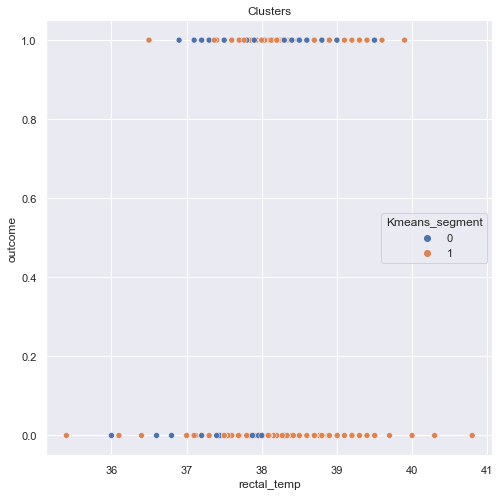

In [43]:
#A scatterplot 
x_axis = horse_kmeans_dum["rectal_temp"]
y_axis = horse_kmeans_dum["outcome"]
plt.figure(figsize = (8,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = horse_kmeans_dum["Kmeans_segment"])
plt.title("Clusters")
plt.show()

In [44]:
#using mapping instead of dummy variables
horses_no_null = horses_no_num_null.drop(['cut_rt','cut_pu'], axis=1)
horses_no_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,cool,reduced,pale_pink,more_3_sec,extreme_pain,absent,severe,died
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,euthanized
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,lived
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,died
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,cool,reduced,dark_cyanotic,more_3_sec,extreme_pain,absent,moderate,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,cold,reduced,pale_cyanotic,more_3_sec,depressed,absent,moderate,euthanized
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,euthanized
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,died
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,lived


In [45]:
print(horses_no_null.temp_of_extremities.unique())
print(horses_no_null.peripheral_pulse.unique())
print(horses_no_null.mucous_membrane.unique())
print(horses_no_null.capillary_refill_time.unique())
print(horses_no_null.pain.unique())
print(horses_no_null.peristalsis.unique())
print(horses_no_null.abdominal_distention.unique())
print(horses_no_null.outcome.unique())

['cool' 'normal' 'cold' 'warm']
['reduced' 'normal' 'absent' 'increased']
['pale_pink' 'pale_cyanotic' 'dark_cyanotic' 'normal_pink' 'bright_red'
 'bright_pink']
['more_3_sec' 'less_3_sec' '3']
['extreme_pain' 'mild_pain' 'depressed' 'severe_pain' 'alert']
['absent' 'hypomotile' 'hypermotile' 'normal']
['severe' 'slight' 'none' 'moderate']
['died' 'euthanized' 'lived']


In [46]:
horses_no_null["temp_of_extremities"] = horses_no_null["temp_of_extremities"].map({"cold":0, "cool":1, 
                                                                                   "normal":2, "warm":3})
horses_no_null["peripheral_pulse"] = horses_no_null["peripheral_pulse"].map({"absent":0, "reduced":1, 
                                                                             "normal":2, "increased":3})
horses_no_null["mucous_membrane"] = horses_no_null["mucous_membrane"].map({"dark_cyanotic":0, "pale_cyanotic":1, 
                                                                           "bright_red":2, "pale_pink":3, 
                                                                           "normal_pink":4, "bright_pink":5})
horses_no_null["capillary_refill_time"] = horses_no_null["capillary_refill_time"].map({"less_3_sec":0, "3":1, 
                                                                                       "more_3_sec":2})
horses_no_null["pain"] = horses_no_null["pain"].map({"extreme_pain":0, "severe_pain":1, "mild_pain":2, 
                                                     "depressed":3, "alert":4})
horses_no_null["peristalsis"] = horses_no_null["peristalsis"].map({"absent":0, "hypomotile":1, 
                                                                   "normal":2, "hypermotile":3})
horses_no_null["abdominal_distention"] = horses_no_null["abdominal_distention"].map({"severe":0, "moderate":1, 
                                                                                     "slight":2, "none":3})
horses_no_null["outcome"] = horses_no_null["outcome"].map({"died":0, "euthanized":1, "lived":2})
horses_no_null

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,1,1,3,2,0,0,0,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,1,0,2,0,2,1
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,2,3,0,2,1,3,2
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,2,0,2,3,0,0,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,1,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,0,1,1,2,3,0,1,1
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,3,1,2,1,1,1,1
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,1,1,0,1,0,1,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,1,1,3,0,2,1,1,2


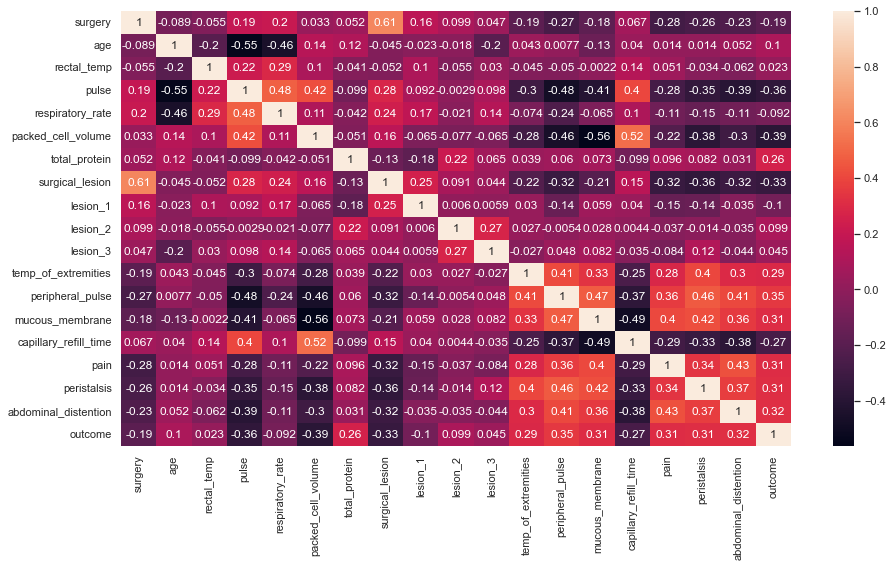

In [47]:
corrMatrix = horses_no_null.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

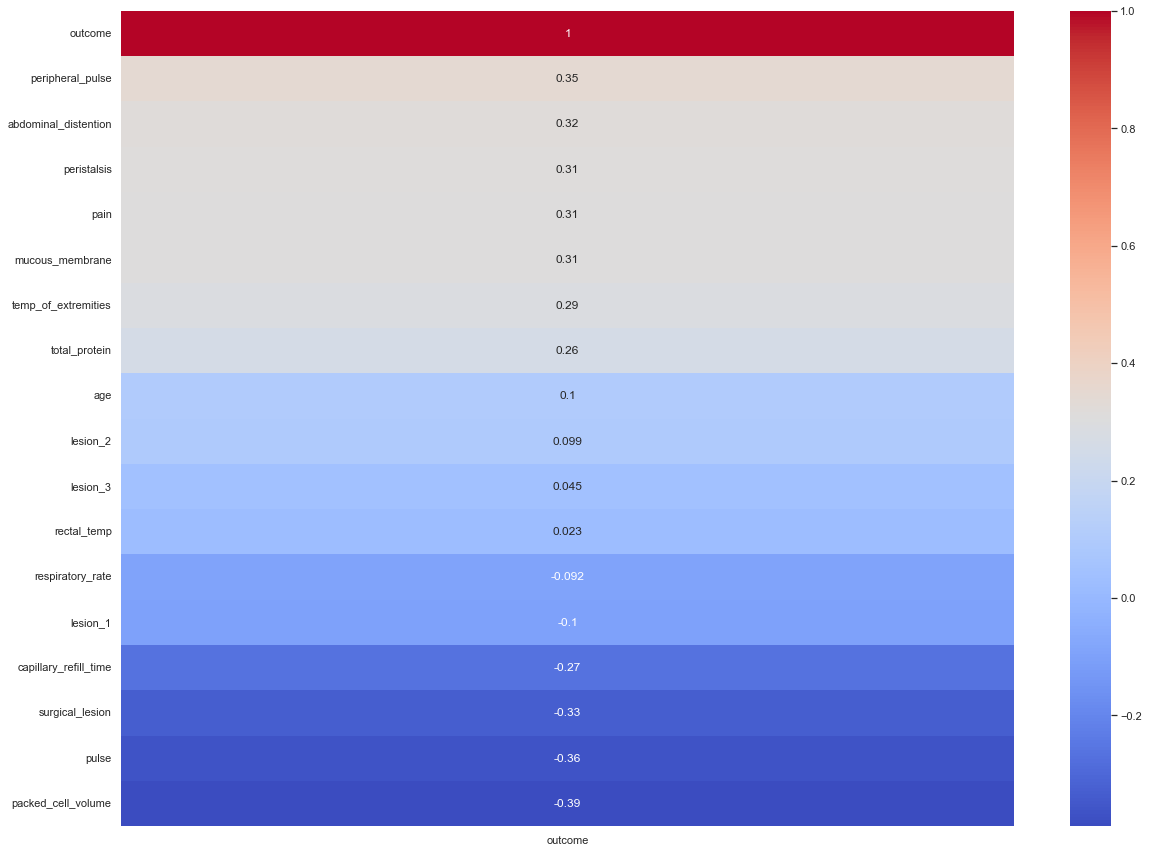

In [48]:
correlation = pd.DataFrame(horses_no_null[horses_no_null.columns[1:]].corr()['outcome'][:].sort_values(ascending=False))
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='outcome', ylabel='packed_cell_volume'>

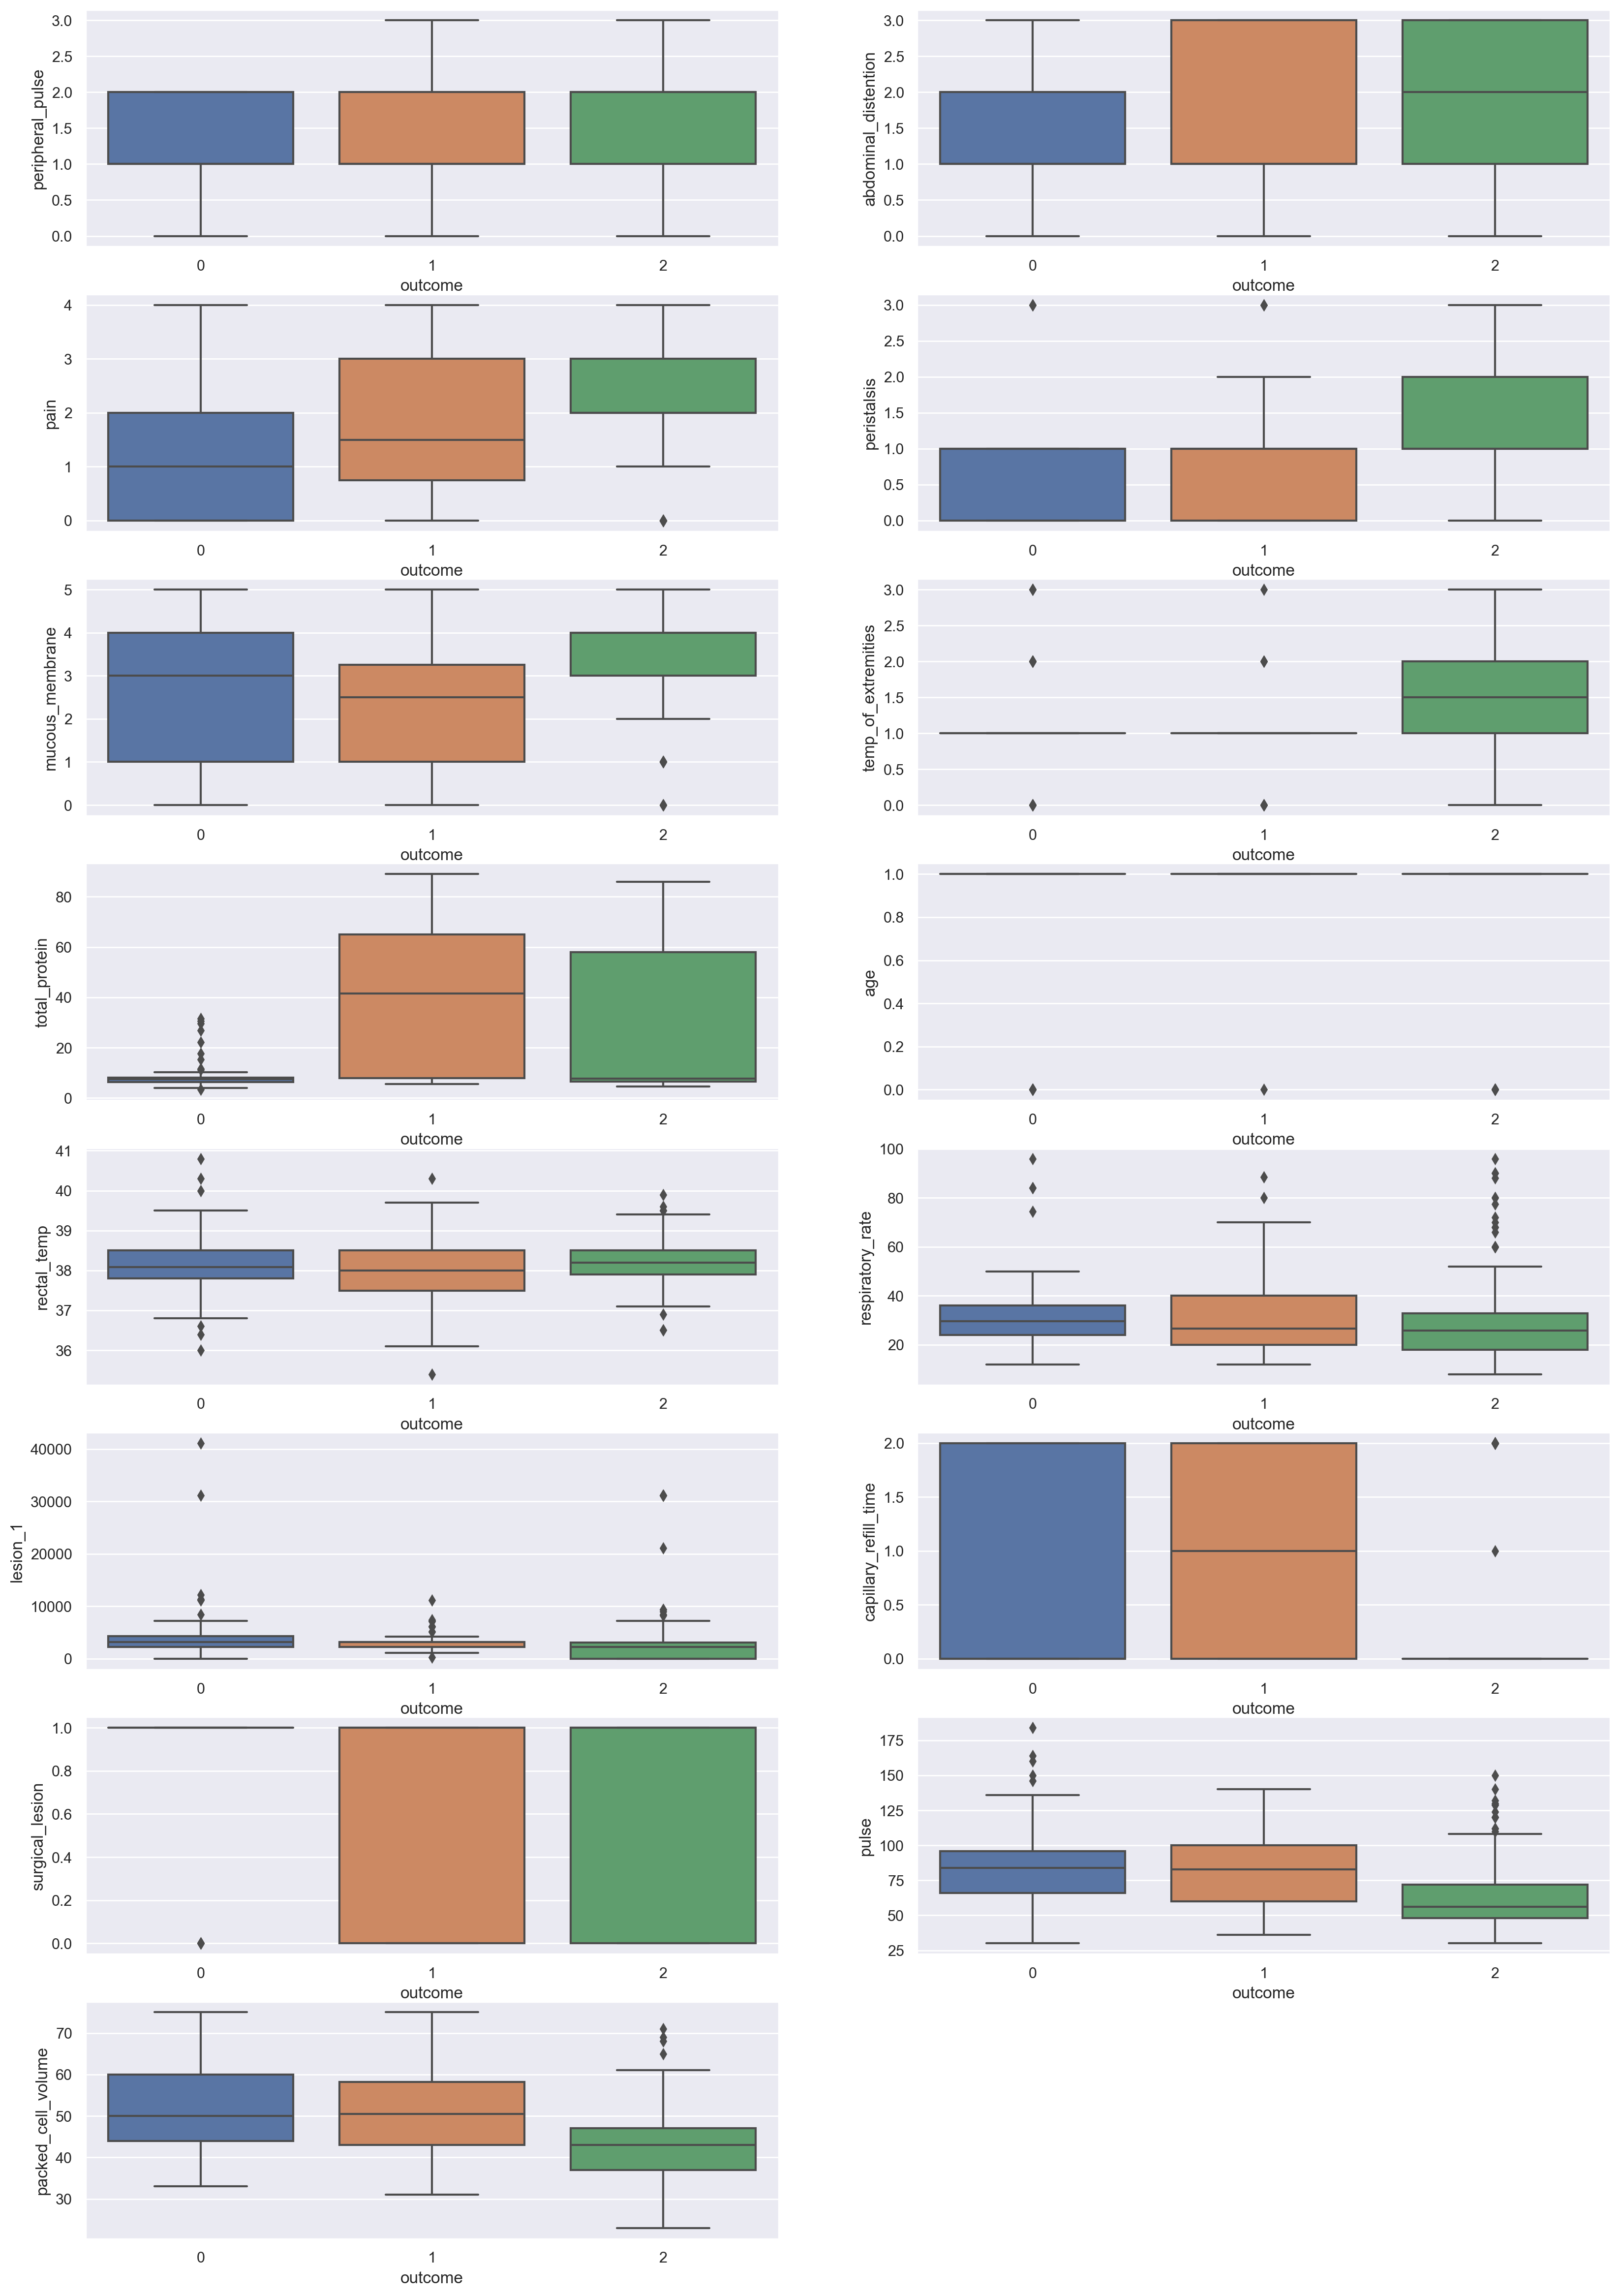

In [49]:
#Peristalsis, temp_of_extremities, capillary_refill_time, pulse and packed_cell_volume appear the best indicators.
#Most of the other features have a significant overlap for the 3 outcomes (died, euthanised, lived)

plt.figure(figsize=(20,30), dpi=200)

plt.subplot(8,2,1)
sns.boxplot(x = 'outcome', y = 'peripheral_pulse', data = horses_no_null)

plt.subplot(8,2,2)
sns.boxplot(x = 'outcome', y = 'abdominal_distention', data = horses_no_null)

plt.subplot(8,2,3)
sns.boxplot(x = 'outcome', y = 'pain', data = horses_no_null)

plt.subplot(8,2,4)
sns.boxplot(x = 'outcome', y = 'peristalsis', data = horses_no_null)

plt.subplot(8,2,5)
sns.boxplot(x = 'outcome', y = 'mucous_membrane', data = horses_no_null)

plt.subplot(8,2,6)
sns.boxplot(x = 'outcome', y = 'temp_of_extremities', data = horses_no_null)

plt.subplot(8,2,7)
sns.boxplot(x = 'outcome', y = 'total_protein', data = horses_no_null)

plt.subplot(8,2,8)
sns.boxplot(x = 'outcome', y = 'age', data = horses_no_null)

plt.subplot(8,2,9)
sns.boxplot(x = 'outcome', y = 'rectal_temp', data = horses_no_null)

plt.subplot(8,2,10)
sns.boxplot(x = 'outcome', y = 'respiratory_rate', data = horses_no_null)

plt.subplot(8,2,11)
sns.boxplot(x = 'outcome', y = 'lesion_1', data = horses_no_null)

plt.subplot(8,2,12)
sns.boxplot(x = 'outcome', y = 'capillary_refill_time', data = horses_no_null)

plt.subplot(8,2,13)
sns.boxplot(x = 'outcome', y = 'surgical_lesion', data = horses_no_null)

plt.subplot(8,2,14)
sns.boxplot(x = 'outcome', y = 'pulse', data = horses_no_null)

plt.subplot(8,2,15)
sns.boxplot(x = 'outcome', y = 'packed_cell_volume', data = horses_no_null)

In [50]:
# prepare data for Machine Learning treatments
horse_data = horses_no_null.copy()
horse_data

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,1,1,3,2,0,0,0,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,1,0,2,0,2,1
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,2,3,0,2,1,3,2
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,2,0,2,3,0,0,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,1,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,0,1,1,2,3,0,1,1
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,3,1,2,1,1,1,1
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,1,1,0,1,0,1,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,1,1,3,0,2,1,1,2


In [51]:
# declare dependent and independent variables
y = horse_data["outcome"]
X = horse_data.drop("outcome", axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=148, stratify=y)

In [53]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [54]:
param = {'max_depth':2, 'eta':0.3, 'objective':'multi:softmax', 'num_class':3}

In [55]:
model = xgb.train(param, train)

In [56]:
# make a prediction
y_pred_xgb = model.predict(test)
y_pred_xgb

array([2., 2., 0., 2., 0., 2., 0., 0., 2., 2., 2., 2., 2., 2., 0., 0., 0.,
       2., 2., 2., 1., 0., 0., 2., 2., 2., 2., 2., 0., 0., 2., 2., 1., 2.,
       0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0.], dtype=float32)

In [57]:
metrics.accuracy_score(y_test, y_pred_xgb)

0.6666666666666666

In [58]:
#Scaling the data to give equal weight to all features
scaled_data_map = StandardScaler().fit_transform(X)
np.mean(scaled_data_map),np.std(scaled_data_map)

(1.8219044506669235e-16, 1.0)

In [59]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data_map, y, test_size=0.20, random_state=148, stratify=y)

y_train.value_counts(), y_test.value_counts()

(2    142
 0     62
 1     35
 Name: outcome, dtype: int64,
 2    36
 0    15
 1     9
 Name: outcome, dtype: int64)

In [60]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 148)
# Train the model on training data
rf.fit(X_train, y_train);

In [61]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.55


In [62]:
#only slightly better results than with dummies
rf.score(X_test, y_test)

0.20486112256586486

In [63]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: pulse                Importance: 0.24
Variable: total_protein        Importance: 0.15
Variable: packed_cell_volume   Importance: 0.14
Variable: rectal_temp          Importance: 0.09
Variable: lesion_1             Importance: 0.09
Variable: respiratory_rate     Importance: 0.07
Variable: pain                 Importance: 0.04
Variable: abdominal_distention Importance: 0.04
Variable: temp_of_extremities  Importance: 0.03
Variable: mucous_membrane      Importance: 0.03
Variable: surgical_lesion      Importance: 0.02
Variable: peripheral_pulse     Importance: 0.02
Variable: peristalsis          Importance: 0.02
Variable: surgery              Importance: 0.01
Variable: capillary_refill_time Importance: 0.01
Variable: age                  Importance: 0.0
Variable: lesion_2             Importance: 0.0
Variable: lesion_3             Importance: 0.0


In [64]:
#Remove columns that are statistically insignificant
sig_X = X.drop(columns =['age', 'lesion_2', 'lesion_3', 'capillary_refill_time'])

In [65]:
# New random forest with only the most significant features
rf_most_important_map = RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 148)

#Scaling the data to give equal weight to all features
scaled_data_map_sig = StandardScaler().fit_transform(sig_X)

# split into train test sets
sig_X_train, sig_X_test, y_train, y_test = train_test_split(scaled_data_map_sig, y, test_size=0.20, random_state=42, stratify=y)

y_train.value_counts(), y_test.value_counts()

(2    142
 0     62
 1     35
 Name: outcome, dtype: int64,
 2    36
 0    15
 1     9
 Name: outcome, dtype: int64)

In [66]:
# Train the random forest
rf_most_important_map.fit(sig_X_train, y_train)
# Make predictions and determine the error
predictions = rf_most_important_map.predict(sig_X_test)
# Display the performance metrics
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.58


In [67]:
rf_most_important_map.score(sig_X_test, y_test)

0.2315544558991981

In [68]:
# Apply Logistic regression to data
logreg1 = LogisticRegression()
logreg1.fit(sig_X_train, y_train)

LogisticRegression()

In [69]:
#A slightly better result than when working with dummies
y_pred = logreg1.predict(sig_X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg1.score(sig_X_test, y_test)))

Accuracy of logistic regression on test set: 0.60


In [70]:
confusion_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_log_reg

array([[ 9,  0,  6],
       [ 3,  2,  4],
       [ 6,  5, 25]], dtype=int64)

In [71]:
# fix hyperparametres
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# chose score to optimise
score = 'accuracy'

# Create kNN with hyperparametre optimiser
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), 
    param_grid,     
    cv=5,           
    scoring=score   
)

# fit kNN to data
clf.fit(sig_X_train, y_train)

# Print optimal hyperparametre
print("Best hyperparametre for training data:")
print(clf.best_params_)

# Print corresponding performance
print("Cross-validation result:")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], 
        clf.cv_results_['std_test_score'],  
        clf.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Best hyperparametre for training data:
{'n_neighbors': 5}
Cross-validation result:
accuracy = 0.645 (+/-0.105) for {'n_neighbors': 3}
accuracy = 0.699 (+/-0.134) for {'n_neighbors': 5}
accuracy = 0.686 (+/-0.092) for {'n_neighbors': 7}
accuracy = 0.682 (+/-0.105) for {'n_neighbors': 9}
accuracy = 0.661 (+/-0.131) for {'n_neighbors': 11}
accuracy = 0.661 (+/-0.101) for {'n_neighbors': 13}
accuracy = 0.678 (+/-0.114) for {'n_neighbors': 15}


In [72]:
y_pred = clf.predict(sig_X_test)
print("\nAnd for test data : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


And for test data : 0.600


In [73]:
#KMeans analysis
#Performing KMeans clustering using the appropriate number of Clusters, i.e. 3
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 148)
kmeans.fit(scaled_data_map_sig)

KMeans(n_clusters=2, random_state=148)

In [74]:
horse_kmeans_map = horse_data.copy()
horse_kmeans_map['outcome'] = horse_kmeans_map["outcome"].map({0:0, 1:0, 2:1})
horse_kmeans_map

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,1,1,3,2,0,0,0,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,1,0,2,0,2,0
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,2,3,0,2,1,3,1
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,2,0,2,3,0,0,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,1,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,0,1,1,2,3,0,1,0
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,3,1,2,1,1,1,0
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,1,1,0,1,0,1,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,1,1,3,0,2,1,1,1


In [75]:
horse_kmeans_map["Kmeans_segment"] = kmeans.labels_
horse_kmeans_map

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome,Kmeans_segment
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,1,1,3,2,0,0,0,0,0
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,1,0,2,0,2,0,0
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,2,3,0,2,1,3,1,1
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,2,0,2,3,0,0,0,0
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,1,1,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,0,1,1,2,3,0,1,0,0
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,3,1,2,1,1,1,0,1
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,1,1,0,1,0,1,0,0
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,1,1,3,0,2,1,1,1,0


In [76]:
horse_kmeans_map['comparison'] = horse_kmeans_map['outcome'] == horse_kmeans_map['Kmeans_segment']
horse_kmeans_map

,surgery,age,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,outcome,Kmeans_segment,comparison
0,0.0,1.0,38.500,66.0,28.0,45.0,8.40,0.0,11300.0,0.0,0.0,1,1,3,2,0,0,0,0,0,True
1,1.0,1.0,39.200,88.0,20.0,50.0,85.00,0.0,2208.0,0.0,0.0,1,1,1,0,2,0,2,0,0,True
2,0.0,1.0,38.300,40.0,24.0,33.0,6.70,0.0,0.0,0.0,0.0,2,2,3,0,2,1,3,1,1,True
3,1.0,0.0,39.100,164.0,84.0,48.0,7.20,1.0,2208.0,0.0,0.0,0,2,0,2,3,0,0,0,0,True
4,0.0,1.0,37.300,104.0,35.0,74.0,7.40,0.0,4300.0,0.0,0.0,1,1,0,2,0,0,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,39.004,120.0,70.0,55.0,65.00,0.0,3205.0,0.0,0.0,0,1,1,2,3,0,1,0,0,True
295,0.0,1.0,37.200,72.0,24.0,44.0,11.84,1.0,2208.0,0.0,0.0,1,3,1,2,1,1,1,0,1,False
296,1.0,1.0,37.500,72.0,30.0,60.0,6.80,1.0,3205.0,0.0,0.0,0,1,1,0,1,0,1,0,0,True
297,1.0,1.0,36.500,100.0,24.0,50.0,6.00,1.0,2208.0,0.0,0.0,1,1,3,0,2,1,1,1,0,False


In [77]:
horse_kmeans_map["comparison"].value_counts()

True     212
False     87
Name: comparison, dtype: int64

In [78]:
contingency_matrix_map = pd.crosstab(horse_kmeans_map['outcome'], horse_kmeans_map['Kmeans_segment'])
contingency_matrix_map

Kmeans_segment,0,1
outcome,,
0,94,27
1,60,118


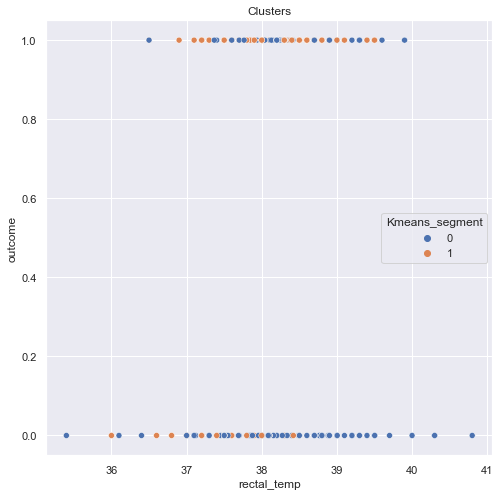

In [79]:
#A scatterplot 
x_axis = horse_kmeans_map["rectal_temp"]
y_axis = horse_kmeans_map["outcome"]
plt.figure(figsize = (8,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = horse_kmeans_map["Kmeans_segment"])
plt.title("Clusters")
plt.show()